In [1]:
%load_ext autoreload
%autoreload 2

from utils import *
from model import *

import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import np_utils
from keras.models import load_model

C:\Users\wlyip\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# config
height, width, depth = 96, 96, 3
save_path = 'model/151_v2.model'
epochs = 200

In [3]:
# change working directory
# os.chdir('D:/pokedex')

In [4]:
image_list, label_list, num_classes = load_dataset('image', height, width)

In [11]:
X_train, X_dev, y_train, y_dev = train_test_split(np.array(image_list), np.array(label_list), 
                                                  test_size=0.2, stratify=label_list)
X_dev, X_test, y_dev, y_test = train_test_split(X_dev, y_dev, 
                                                test_size=0.5, stratify=y_dev)

y_train = np_utils.to_categorical(y_train)
y_dev = np_utils.to_categorical(y_dev)

In [6]:
pokemon_df = load_textdata("pokemon.csv")

In [7]:
model = build_model(height, width, depth, num_classes)

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 96, 96, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        18496     
__________

In [13]:
model, history = train_model(model, epochs, save_path, X_train, y_train, 
                             X_dev, y_dev, data_augmentation=True)

Epoch 1/200
717/716 [==============================] - 178s 248ms/step - loss: 4.6099 - acc: 0.0520 - val_loss: 5.0265 - val_acc: 0.0750

Epoch 00001: val_loss improved from inf to 5.02645, saving model to model/151_v2.model
Epoch 2/200
717/716 [==============================] - 135s 189ms/step - loss: 3.9346 - acc: 0.1081 - val_loss: 3.9328 - val_acc: 0.1339

Epoch 00002: val_loss improved from 5.02645 to 3.93276, saving model to model/151_v2.model
Epoch 3/200
717/716 [==============================] - 135s 189ms/step - loss: 3.6000 - acc: 0.1579 - val_loss: 3.6901 - val_acc: 0.1576

Epoch 00003: val_loss improved from 3.93276 to 3.69007, saving model to model/151_v2.model
Epoch 4/200
717/716 [==============================] - 135s 188ms/step - loss: 3.3656 - acc: 0.1974 - val_loss: 3.4147 - val_acc: 0.1963

Epoch 00004: val_loss improved from 3.69007 to 3.41467, saving model to model/151_v2.model
Epoch 5/200
717/716 [==============================] - 135s 188ms/step - loss: 3.1606 - 

717/716 [==============================] - 135s 188ms/step - loss: 0.8017 - acc: 0.7676 - val_loss: 1.5262 - val_acc: 0.6346

Epoch 00040: val_loss did not improve from 1.50411
Epoch 41/200
717/716 [==============================] - 135s 188ms/step - loss: 0.7643 - acc: 0.7781 - val_loss: 1.5847 - val_acc: 0.6304

Epoch 00041: val_loss did not improve from 1.50411
Epoch 42/200
717/716 [==============================] - 135s 188ms/step - loss: 0.7903 - acc: 0.7718 - val_loss: 1.4469 - val_acc: 0.6632

Epoch 00042: val_loss improved from 1.50411 to 1.44694, saving model to model/151_v2.model
Epoch 43/200
717/716 [==============================] - 135s 188ms/step - loss: 0.6981 - acc: 0.7947 - val_loss: 1.5621 - val_acc: 0.6440

Epoch 00043: val_loss did not improve from 1.44694
Epoch 44/200
717/716 [==============================] - 134s 188ms/step - loss: 0.6823 - acc: 0.7986 - val_loss: 1.4346 - val_acc: 0.6538

Epoch 00044: val_loss improved from 1.44694 to 1.43457, saving model to mo

717/716 [==============================] - 135s 188ms/step - loss: 0.2038 - acc: 0.9366 - val_loss: 1.2993 - val_acc: 0.7284

Epoch 00079: val_loss did not improve from 1.27201
Epoch 80/200
717/716 [==============================] - 135s 189ms/step - loss: 0.2025 - acc: 0.9364 - val_loss: 1.2949 - val_acc: 0.7263

Epoch 00080: val_loss did not improve from 1.27201
Epoch 81/200
717/716 [==============================] - 135s 188ms/step - loss: 0.2020 - acc: 0.9374 - val_loss: 1.3076 - val_acc: 0.7291

Epoch 00081: val_loss did not improve from 1.27201

Epoch 00081: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
Epoch 82/200
717/716 [==============================] - 136s 190ms/step - loss: 0.2036 - acc: 0.9351 - val_loss: 1.3275 - val_acc: 0.7238

Epoch 00082: val_loss did not improve from 1.27201
Epoch 83/200
717/716 [==============================] - 135s 188ms/step - loss: 0.2064 - acc: 0.9348 - val_loss: 1.2990 - val_acc: 0.7238

Epoch 00083: val_loss did not im

Text(0,0.5,'Loss')

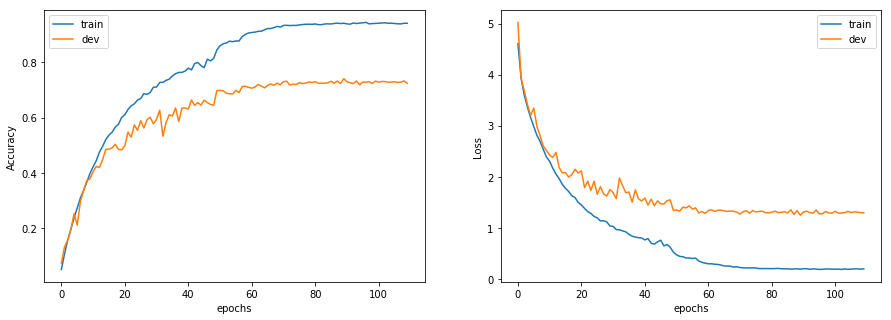

In [14]:
f, ax = plt.subplots(ncols=2, figsize=(15, 5))
ax[0].plot(history.history['acc'], label='train')
ax[0].plot(history.history['val_acc'], label='dev')
ax[0].legend()
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(history.history['loss'], label='train')
ax[1].plot(history.history['val_loss'], label='dev')
ax[1].legend()
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('Loss')

## Evaluation

In [15]:
# load the best model
model = load_model(save_path)

In [18]:
pred_test = model.predict(X_test/255.)
print(classification_report(y_test, np.argmax(pred_test, axis=1), target_names=pokemon_df['name'].values))

              precision    recall  f1-score   support

   Bulbasaur       0.91      0.95      0.93        44
     Ivysaur       0.96      0.88      0.92        26
    Venusaur       0.79      0.86      0.83        22
  Charmander       0.89      0.80      0.84        20
  Charmeleon       0.66      0.74      0.70        31
   Charizard       0.86      0.95      0.90        19
    Squirtle       1.00      0.94      0.97        17
   Wartortle       0.94      1.00      0.97        31
   Blastoise       0.78      0.86      0.82        21
    Caterpie       0.82      1.00      0.90        18
     Metapod       0.93      0.88      0.90        16
  Butterfree       0.96      0.92      0.94        26
      Weedle       0.92      0.80      0.86        15
      Kakuna       0.93      0.93      0.93        14
    Beedrill       0.78      0.78      0.78        18
      Pidgey       0.67      0.59      0.62        17
   Pidgeotto       0.67      0.71      0.69        17
     Pidgeot       0.65    

([<matplotlib.axis.YTick at 0x128af0fbcc0>,
 <a list of 151 Text yticklabel objects>)

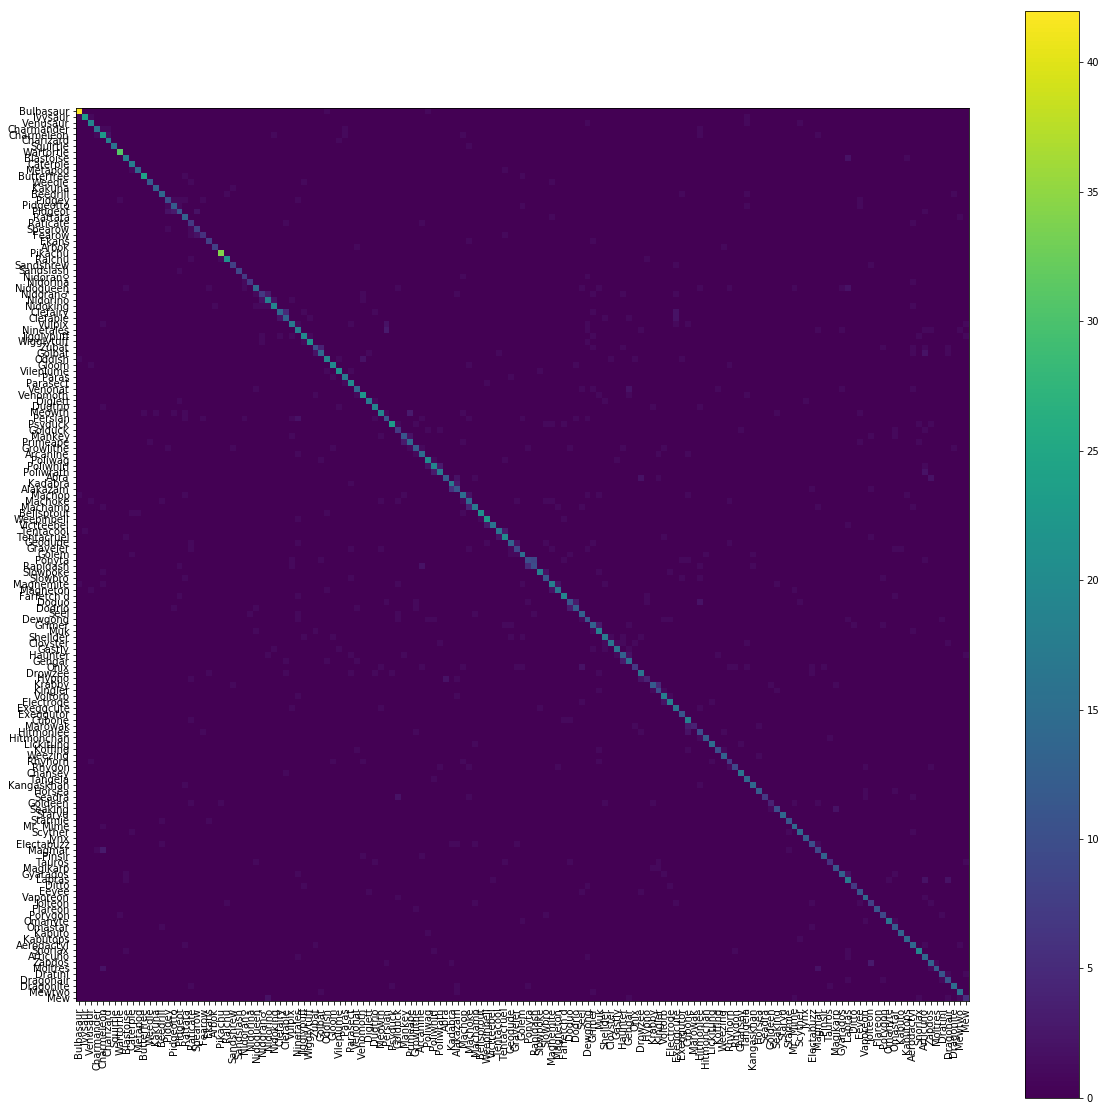

In [19]:
plt.figure(figsize=(20, 20))
cnf_matrix = confusion_matrix(y_test, np.argmax(pred_test, axis=1))
class_names = pokemon_df['name'].values
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)